# COGS180 FINAL PROJECT

# Overview
In this project. I will identify the relationship between ratings, review_counts, the provision of phone numbers on yelp and zipcodes of parks. I used 2 datasets which provides locations informations and ratings for parks in San Diego. From this analysis, I find out that most of the parks are crowded within a range of zipcodes, and the provision of phone numbers on yelp is positively correlated with the number of yelp reviews. Unfortunately,I did not find any relationship between these variables and ratings

# Name and Github
- Name: Rui Zheng
- PID: A15046475
- Github Username: catherinerui

# Research Questions
What is the relationship between ratings, review_counts, the provision of phone numbers on yelp and zipcodes of parks? For this data analysis, we will only look at parks in San Diego.

# Background and prior work
Parks provides leisure and joy to people at no cost. No matter what country it is, people would go to parks to have family time, walk their dogs and have fun. Travellers would visit a city's park as experiencing how is it like to live in this city (1). 

There are many parks in San Diego, and the parks distributes around the city. Most of the times, people would just visit a park in the center of the city, and the number of visits to a park suggests the popularity of a park. Yet many other factors may affect people's selection of park. For both residents and travellers, they may just go to a park that is close to where they live (2). Travellers comes to a city with specified purposes, and they may want to know what the park has in order to pick the park they want to go to (3).

Yelp is a well-known platform in which people use to get information of a place unknown. Travellers or even residents who want to explore a new spot in the city use Yelp ratings and Yelp reviews to consider how good the new location is. There is also a functionality on yelp which shows the distance from user and all the parks nearby, which is also important in people's decision making. Other researches deep dives how Yelp affects bussiness success. prior research analysis suggests that there is a positive relationship between review ratings and the number of visits(4). This project will not only explore the relationship between Yelp reviews and number of visits, but also if provising the phone number of the bussiness and the zipcodes influences the number of visits or ratings of the park, in order to gain insight of how yelp review may help park gain visitors

References
1. https://cnr.ncsu.edu/news/2015/11/why-a-trip-to-the-park-is-good-for-your-health/ 
2. https://ij-healthgeographics.biomedcentral.com/articles/10.1186/1476-072X-10-31
3. https://www.wordstream.com/blog/ws/2017/04/19/travel-marketing-tips
4. https://www.researchgate.net/publication/318138987_Does_Yelp_Matter_Analyzing_And_Guide_to_Using_Ratings_for_a_Quick_Serve_Restaurant_Chain

# Hypothesis
I hypothesize that there is a positive relationship between Yelp rating and the number of visits to a park, because when Yelp rating is high, people think the park is good and are more likely to visit the park. 
Because the accessibility to parks at different zipcode is different, therefore at certain zipcodes, number of visits will be much higher than other ones. 
People may need to know more about the park before going, having access to park's phone numbers will enable great communication and letting potential visitors know if the park has what they are looking for, so parks providing phone numbers will have more visitors than parks which don't.

# Datasets
The ideal Yelp rating dataset will include the park's ratings, the park's annual/monthly visitors, the park's phone number, the park's zipcodes and the park's longitude and latitude. The ideal geojson file will contain the geographical informations of San Diego and geographical information of all the parks in San Diego.

I have no luck finding any ideal datasets online. However, I've found close-to-ideal datasets among those provided by the professor. Under certain assumption, these datasets would be my ideal datasets.

Dataset:
- Dataset Name: yelp_SD_parks.csv
- Link to the dataset: Dataset provided by professor
- Number of observations: 828 observations

This Dataset includes park names, rating of the park on Yelp, number of reviews on Yelp, Address of the parks on yelp, phone number of the park, longitude and lattitude of the park, and other general informations.

#### Assumption:
For dataset, I assume that the review count is positively correlated with the number of visitor of the park,and replaced the number of visitors with the number of review counts. I can not find any dataset online for the actual visitors in each park every year. 

#### Usage plan
All of the analysis will be conducted using Dataset 2

# Setup

In [206]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'
import patsy
import statsmodels.api as sm

# Loading Data

In [207]:
df2 = pd.read_csv('yelp_SD_parks.csv')

# Data Cleaning

### Dataset 2
Since the majority of the analysis will be performed on dataset 2, so I first cleaned dataset 2.

In [208]:
df2.head(1)

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.15315,32.734502,False


Dataset 2 does not have everything i need prepared, but i can extract all the information from the dataset. I need the zipcode, so I extracted from the adress columns. I need a boolean column which tells if the park has provided phone numbers, which I can transform from the phone column.

In [209]:
df2['phonenumber'] = df2['phone'].apply(lambda x: 0 if np.isnan(x) else 1)
df2['zipcode'] = df2['address'].apply(lambda x: x.split(',')[-1].strip())

We need to double check the zip code column because it is easy to have errors when manipulating textual data due to formatting differences.

In [210]:
df2['zipcode'].unique()

array(['CA 92101', 'CA 92108', 'CA 92116', 'CA 92118', 'CA 92123',
       'CA 92110', 'CA 92109', 'CA 92117', 'CA 92111', 'CA 92130',
       'CA 92107', 'CA 92129', 'CA 92131', 'CA 92119', 'CA 92120',
       'CA 92106', 'CA 92104', 'CA 92037', 'CA 92127', 'CA 92124',
       'CA 92126', 'CA 92122', 'CA 92075', 'CA 92103', 'CA 92182',
       'CA 92102', 'CA 92078', 'CA 91942', 'CA 91915', 'CA 92624',
       'CA 92071', 'CA 92029', 'CA 92064', 'CA 92074', 'CA 92021',
       'CA 92024', 'CA 91932', 'CA 92136', 'CA 92139', 'CA 92040',
       'CA 91945', 'CA 91977', 'CA 91902', 'CA 92026', 'CA 92121',
       'CA 92115', 'CA 92105', 'CA 92113', 'CA 91910', 'CA 92707',
       'CA 92171', 'CA 92114', 'CA 91010', 'CA 91950', 'CA 92014',
       'CA 90717', 'CA', 'CA 92011', 'CA 92065', 'CA 92058', 'CA 92033',
       'CA 91941', 'CA 92154', 'CA 92039', 'CA 92093', 'CA 92166',
       'CA 92007', 'CA 92173', 'CA 92025', 'CA 90815',
       'Baja California Mexico', 'CA 92083', 'CA 92084', 'CA 92008',

Most of the zipcode seems to be reasonable transformations, but there are discrepancies that need to be examined

In [211]:
df2[df2['zipcode']=='Baja California Mexico']['address']

312    Av. Revolución S/N Col. Centro 22000 Tijuana, ...
556    Carrillo Puerto y o Tercera Col. Zona Centro 2...
Name: address, dtype: object

#### These parks are in Mexico but not in San Diego

In [212]:
df2[df2['zipcode']=='CA']['address']

226                     San Diego, CA
314                     San Diego, CA
747    Carmel Valley Rd San Diego, CA
Name: address, dtype: object

#### These parks do not have zipcode clarrified
For both cases, I decided to drop these observation because these are maybe errors and missing informations during the data collection process

In [213]:
df2 = df2.drop([312,556,226,314,747]).reset_index(drop = True)

I want to make the zipcodes purely numerical for my analysis afterwards

In [214]:
df2['zipcode'] = df2.zipcode.apply(lambda x: np.int(x[-5:]))

Also I need the geojson information of each park, which i can derive from the longitude and latitude information. These information may help me with geographical analysis and visualization afterwards.

In [215]:
geo2 = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.longitude, df2.latitude))

In [216]:
geo2.columns

Index(['name', 'address', 'phone', 'id', 'url', 'rating', 'review_count',
       'longitude', 'latitude', 'is_closed', 'phonenumber', 'zipcode',
       'geometry'],
      dtype='object')

At this stage, there are some columns containing the same information (address,phone,longitude,latitude', and certian columns that i will not use for the project (id,url,isclosed). I will drop this column to make this dataset more manageable.

In [217]:
geo2 = geo2[['name', 'address', 'review_count','zipcode','phonenumber','geometry','rating']]
geo2.head()

,name,address,review_count,zipcode,phonenumber,geometry,rating
0,Balboa Park,"1549 El Prado San Diego, CA 92101",2105,92101,1,POINT (-117.15315 32.73450),5.0
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",46,92108,0,POINT (-117.14728 32.77831),4.5
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",242,92101,1,POINT (-117.17248 32.72195),4.5
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",102,92116,0,POINT (-117.14379 32.76246),4.5
4,Bay View Park,"413 1st St Coronado, CA 92118",42,92118,0,POINT (-117.17897 32.70179),5.0


# Data analysis and results

### General overview

In [218]:
geo2.describe() 

,review_count,zipcode,phonenumber,rating
count,828.000000,828.000000,828.000000,828.000000
mean,202.414251,92089.254831,0.696860,4.039251
std,746.871311,145.319168,0.459893,0.797119
min,1.000000,90069.000000,0.000000,1.000000
25%,6.000000,92101.000000,0.000000,3.500000
50%,22.000000,92106.000000,1.000000,4.000000
75%,109.250000,92120.000000,1.000000,4.500000
max,14195.000000,92879.000000,1.000000,5.000000


From the above table, I observed that review_count has very large outliers, and i want to check how bad the outlier is from the majority to decide if to exclude them from the observation, since outliers can cause negative influence on analysis validity.

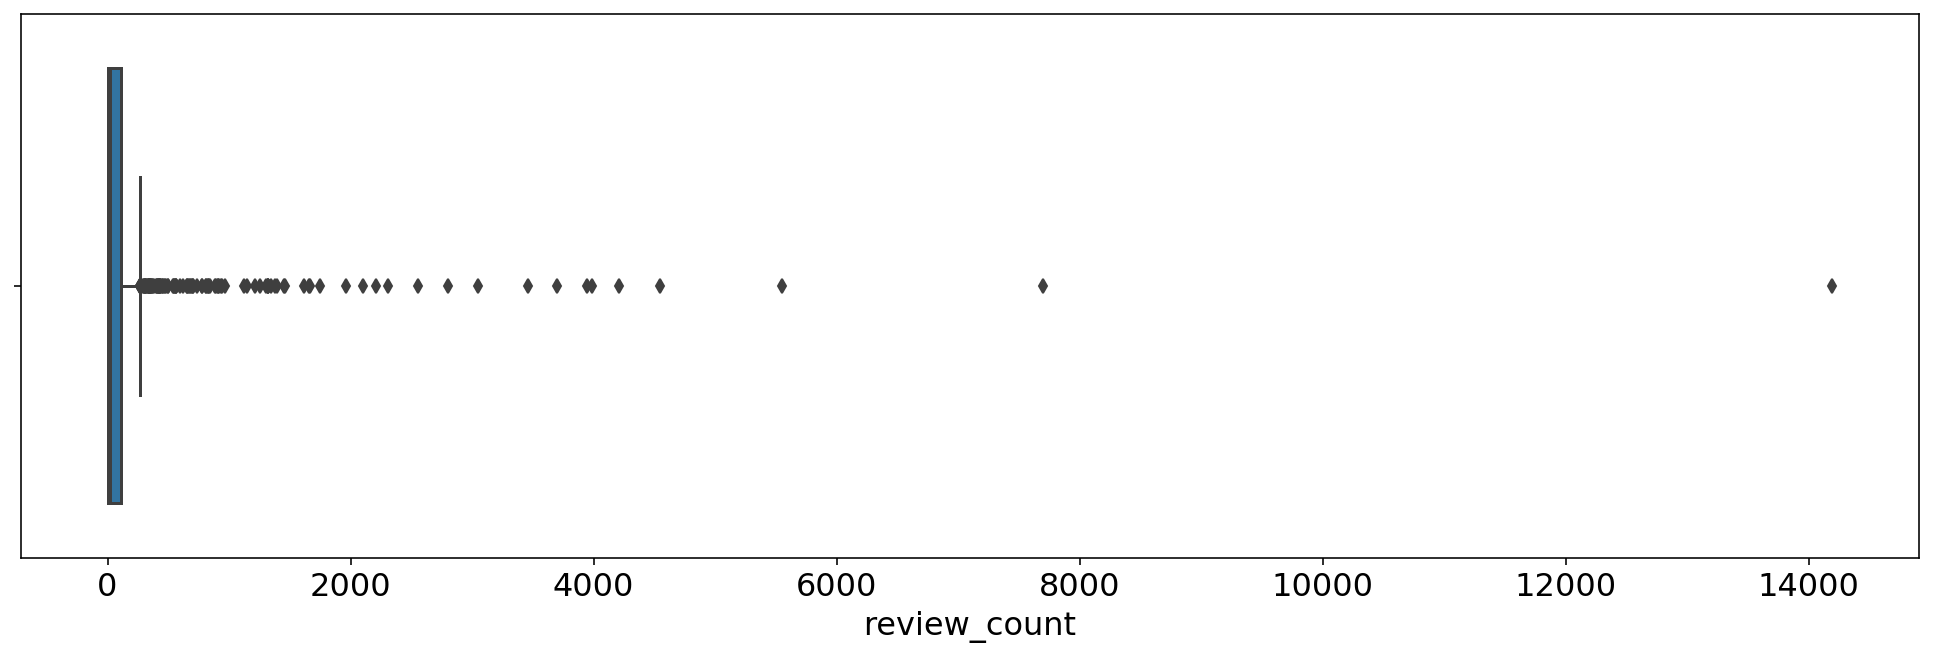

In [219]:
sns.boxplot(geo2['review_count'])

The above boxplot shows the outlier has very large variations from the majority, so I will restrict this analysis within certain review count ranges to better explore specified relationships in the majority of parks. This may also be a limitation for the following analysis, since these analysis will not consider certain parks in San Diego, making the analysis not comprehensive.

In [220]:
 #Q1 – 1.5×IQR or above Q3 + 1.5×IQR
q1 = np.percentile(geo2['review_count'],25)
q2 = np.percentile(geo2['review_count'],75)
lower = q1 - 1.5*(q2-q1)
upper = q1 = 1.5*(q2-q1)
geo2 = geo2[(geo2['review_count']>=lower)&(geo2['review_count']<= upper)]

In [221]:
geo2.describe() 

,review_count,zipcode,phonenumber,rating
count,655.000000,655.000000,655.000000,655.000000
mean,28.607634,92086.462595,0.639695,4.041985
std,35.256122,158.739621,0.480456,0.837843
min,1.000000,90069.000000,0.000000,1.000000
25%,4.000000,92088.500000,0.000000,3.500000
50%,13.000000,92108.000000,1.000000,4.000000
75%,43.000000,92122.000000,1.000000,4.500000
max,152.000000,92879.000000,1.000000,5.000000


### Univaraite analysis

Text(0, 0.5, 'frequency')

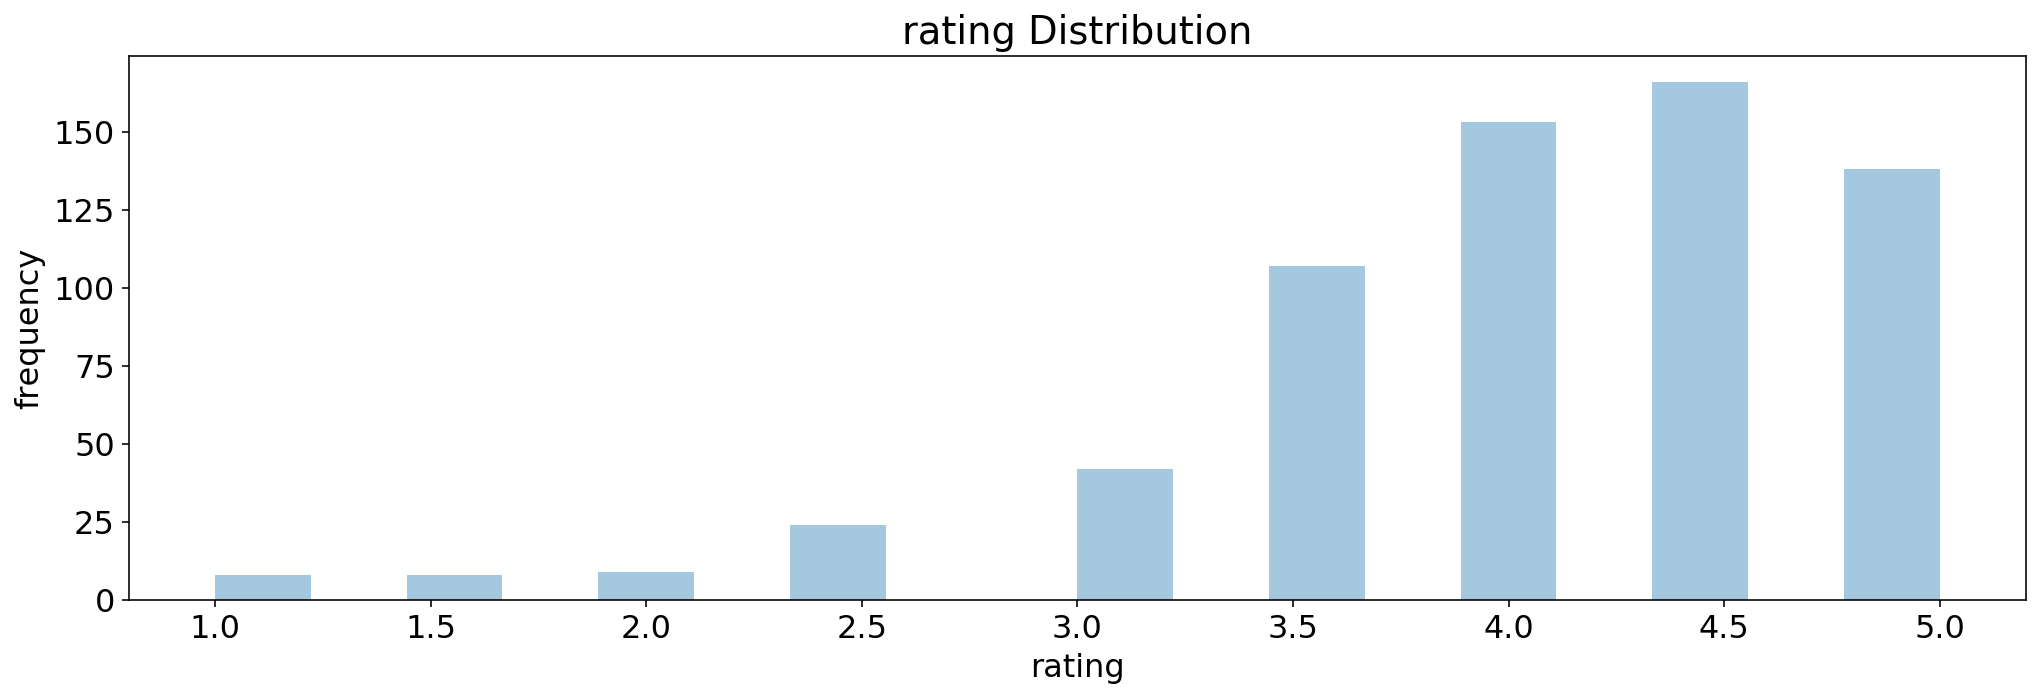

In [222]:
ax = sns.distplot(geo2['rating'], kde=False)
ax.set_title('rating Distribution')
ax.set_ylabel('frequency')

Majority of parks in the dataset have ratings ranges from 4 to 5, and most parks have ratings at 4.5.

Text(0, 0.5, 'frequency')

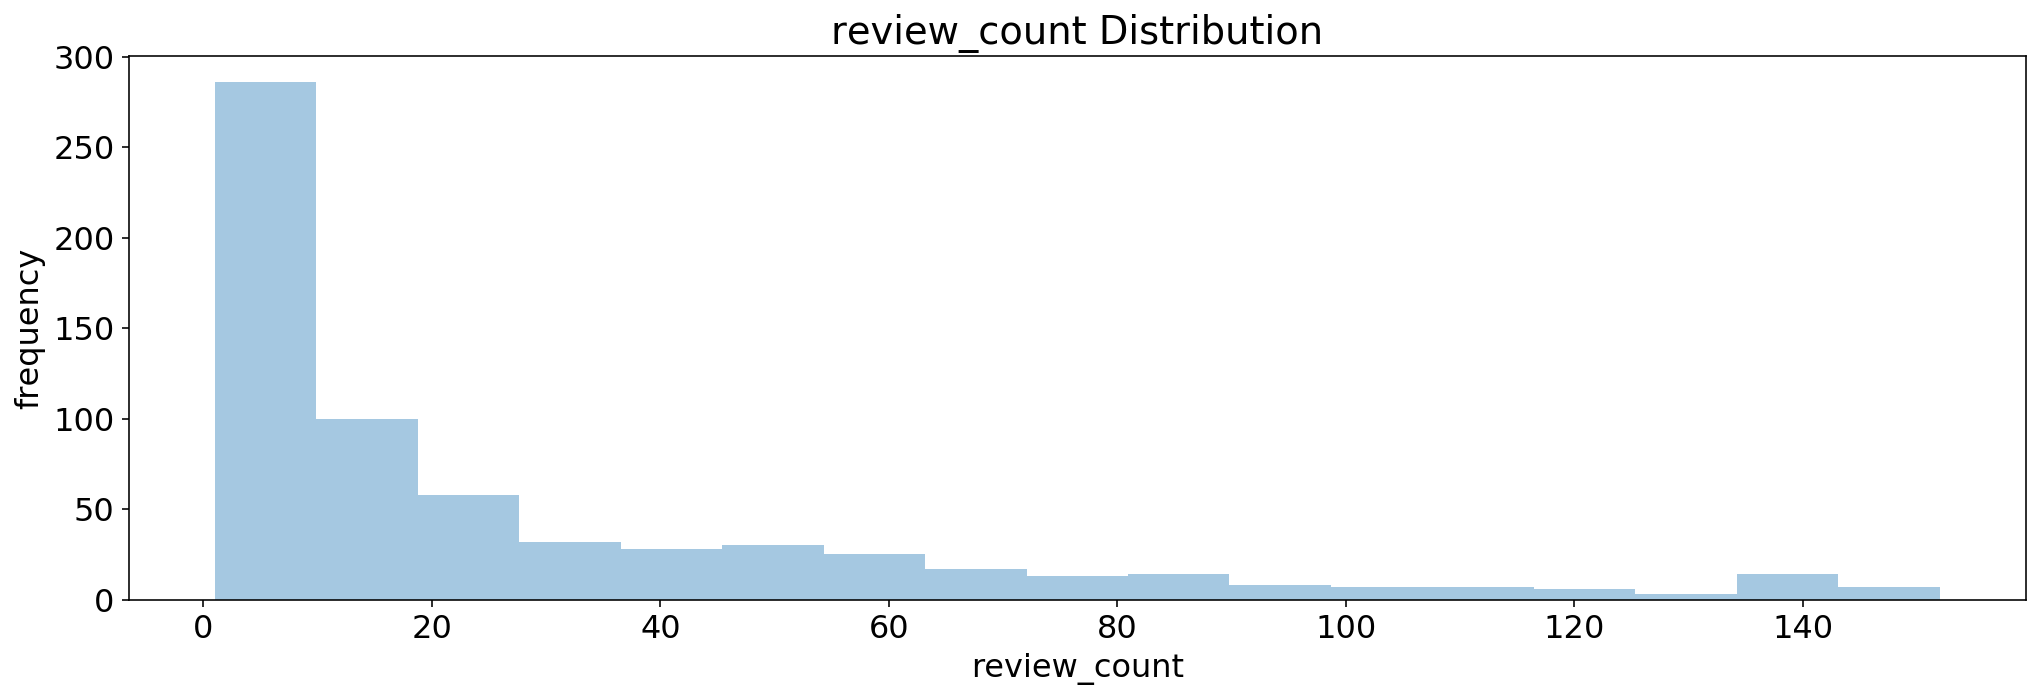

In [223]:
ax = sns.distplot(geo2['review_count'], kde=False)
ax.set_title('review_count Distribution')
ax.set_ylabel('frequency') 

The above chart shows most parks have revire_count less than 40

Text(0, 0.5, 'frequency')

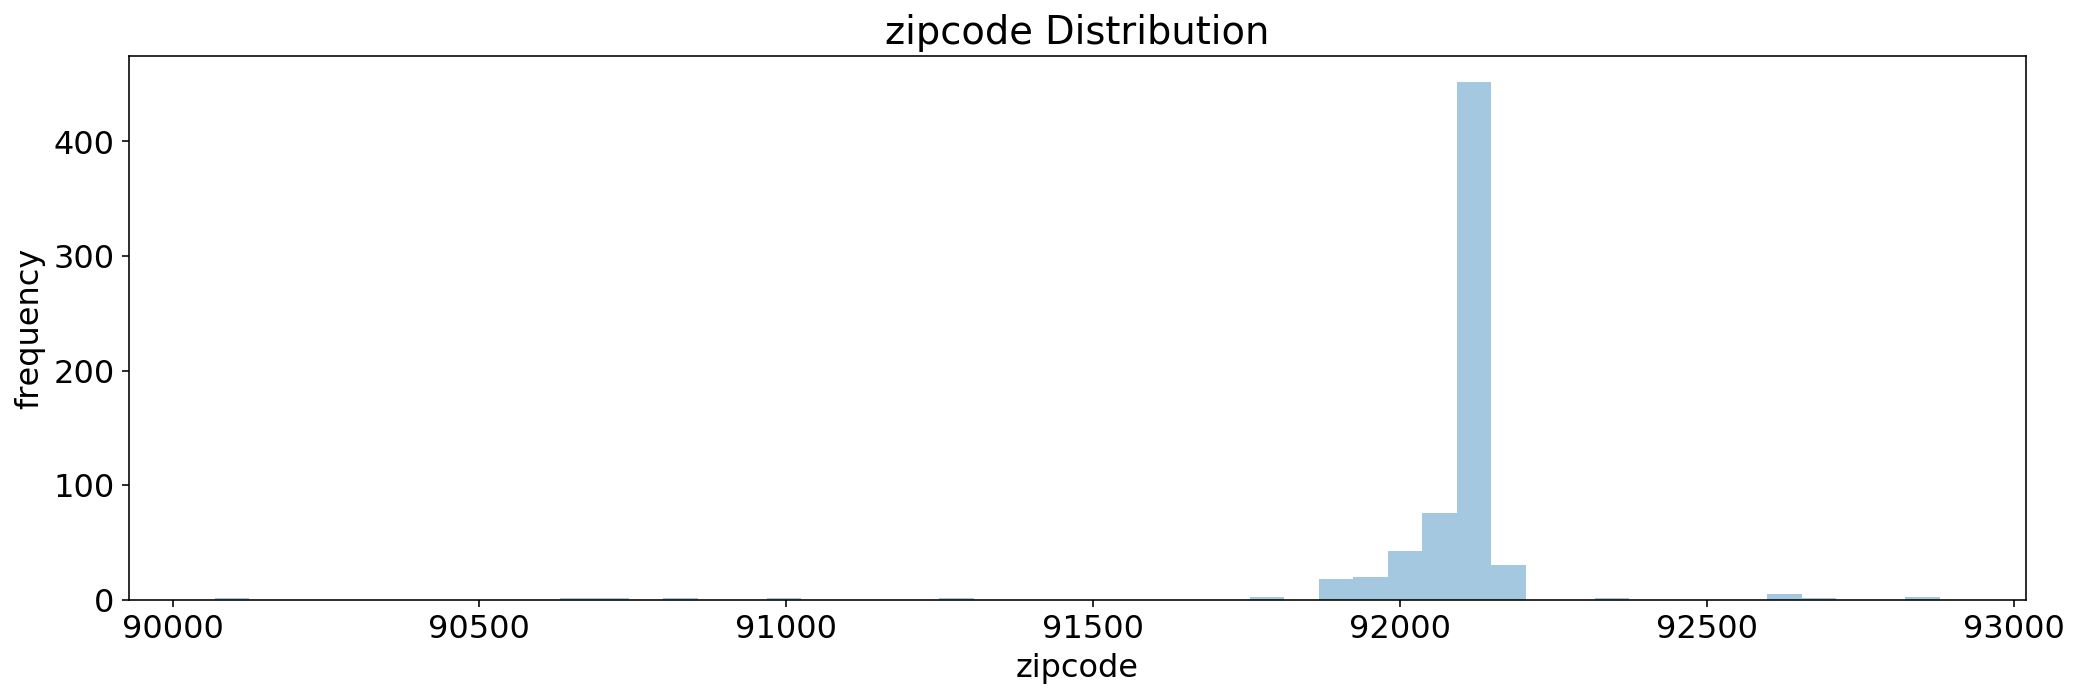

In [224]:
ax = sns.distplot(geo2['zipcode'], kde=False)
ax.set_title('zipcode Distribution')
ax.set_ylabel('frequency')

Most parks clusters at areas with zipcode around 92000, while other areas rarely have any parks. This shows the lack of accessibility at certain areas in San Diego.

Text(0, 0.5, 'frequency')

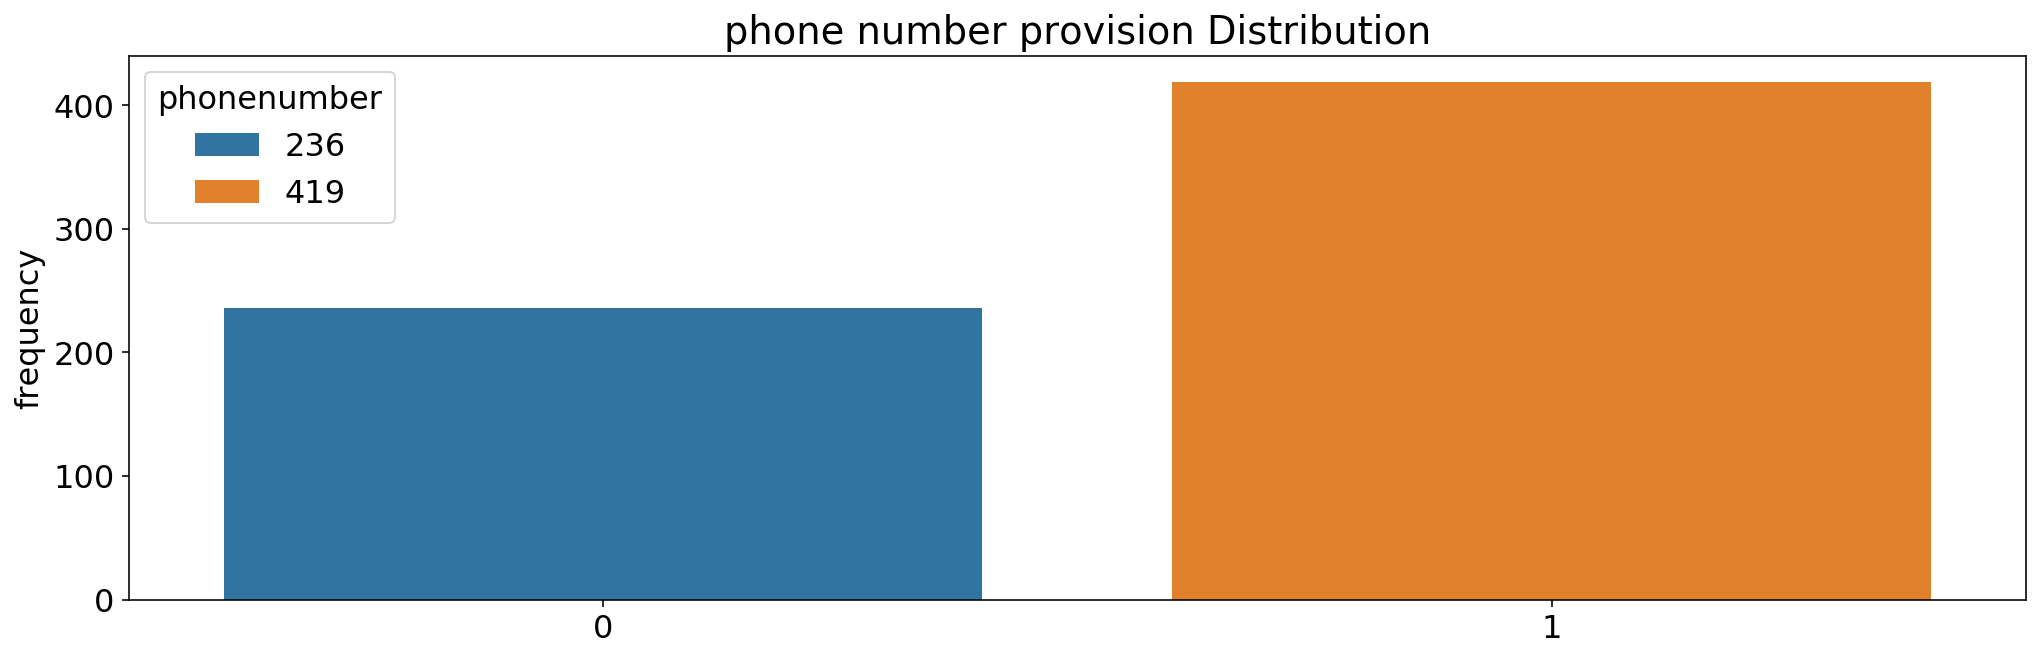

In [225]:
ax = sns.barplot(x=phone.index, y='phonenumber', hue="phonenumber",data=phone, dodge=False)
ax.set_title('phone number provision Distribution')
ax.set_ylabel('frequency')

There are nearly double the number of parks providing phone numbers than those who don't

### Bivariate analysis

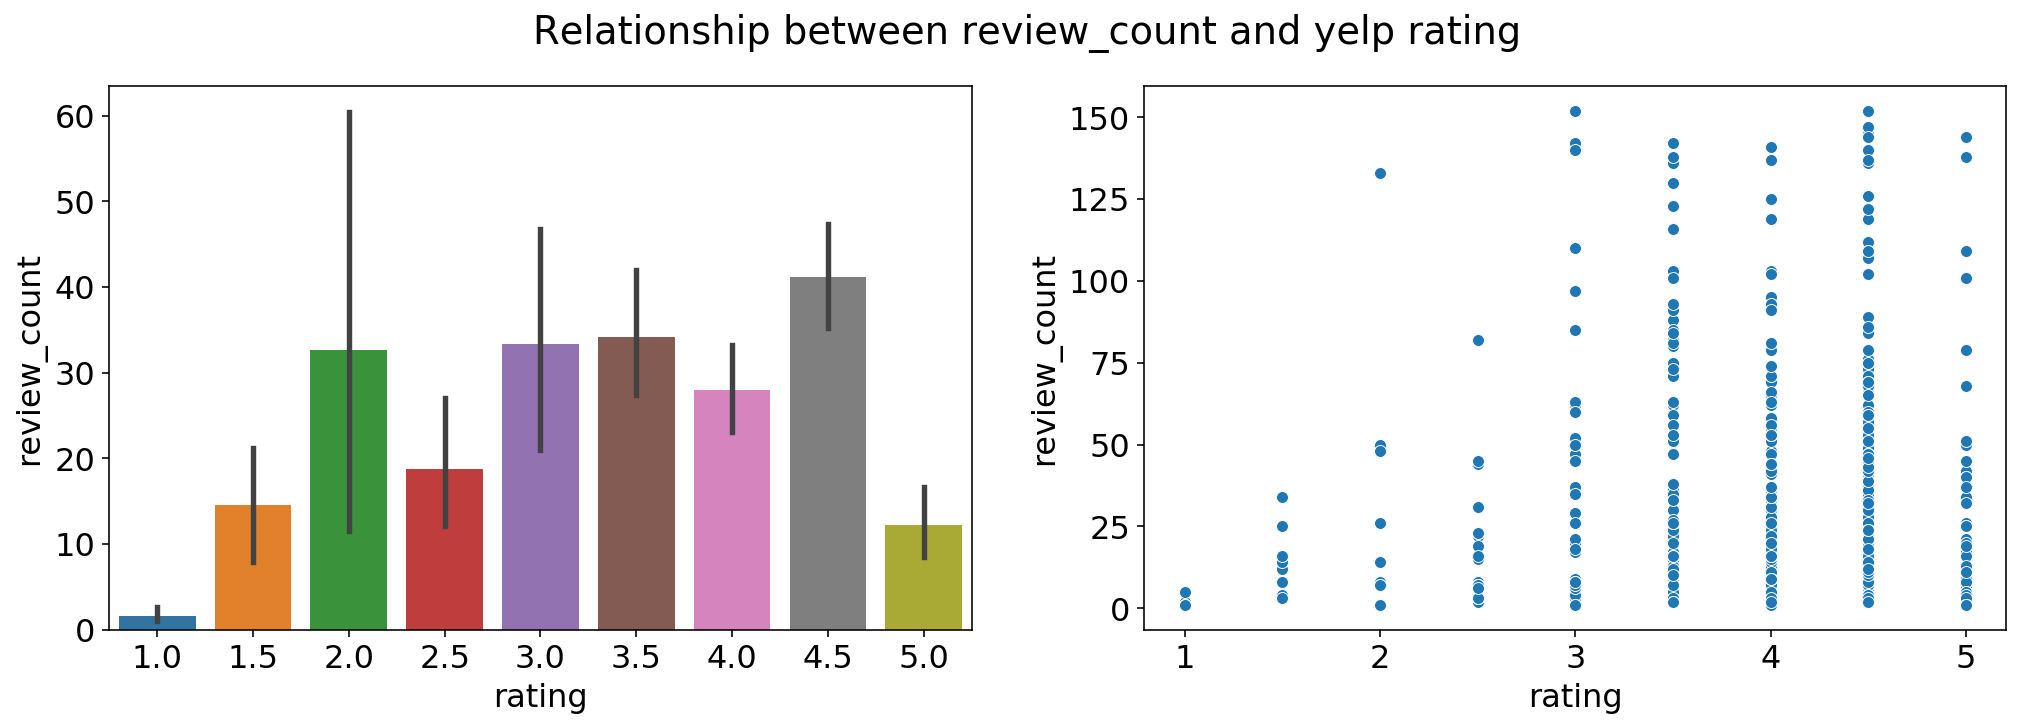

In [226]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Relationship between review_count and yelp rating')
sns.barplot(ax=axes[0],x='rating', y='review_count', data=geo2)
sns.scatterplot(ax=axes[1],x='rating', y='review_count', data=geo2)

The above charts shows the rating in the middle tend to have higher review_counts, but  it is unclear if there is a relationship between yelp rating and review_counts.

Text(0.5, 1.0, 'Relationship between zipcode and review_count')

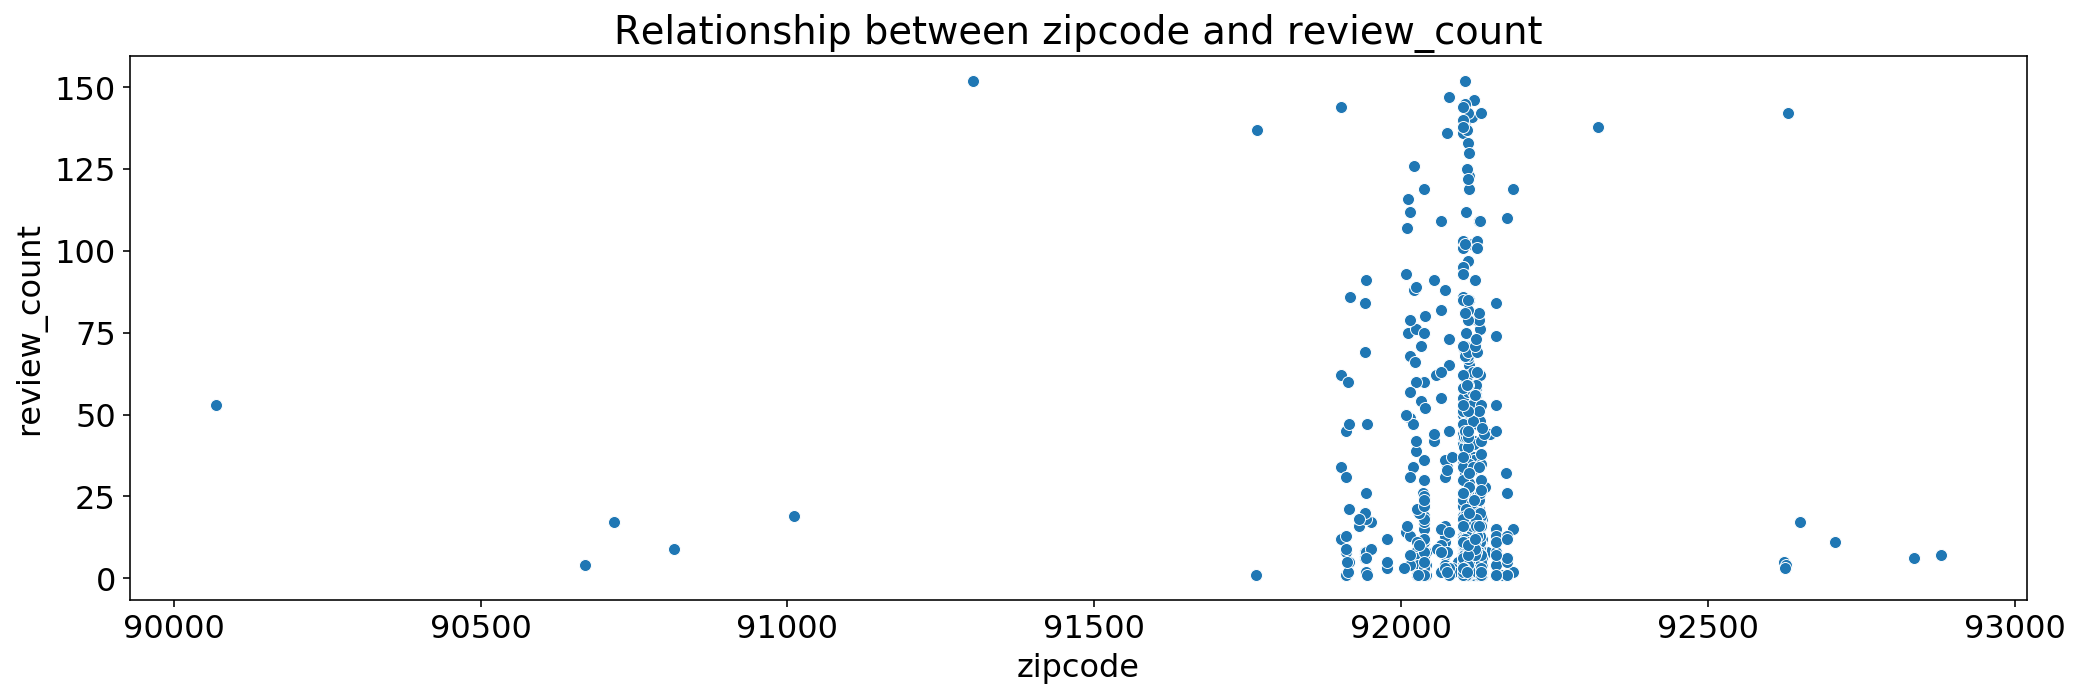

In [227]:
ax = sns.scatterplot(x='zipcode', y='review_count', data=geo2)
ax.set_title('Relationship between zipcode and review_count')

Based on above graph, it is unclear if there is a relationship between zipcode and review_counts.

Text(0.5, 1.0, 'Relationship between phonenumber and review_count')

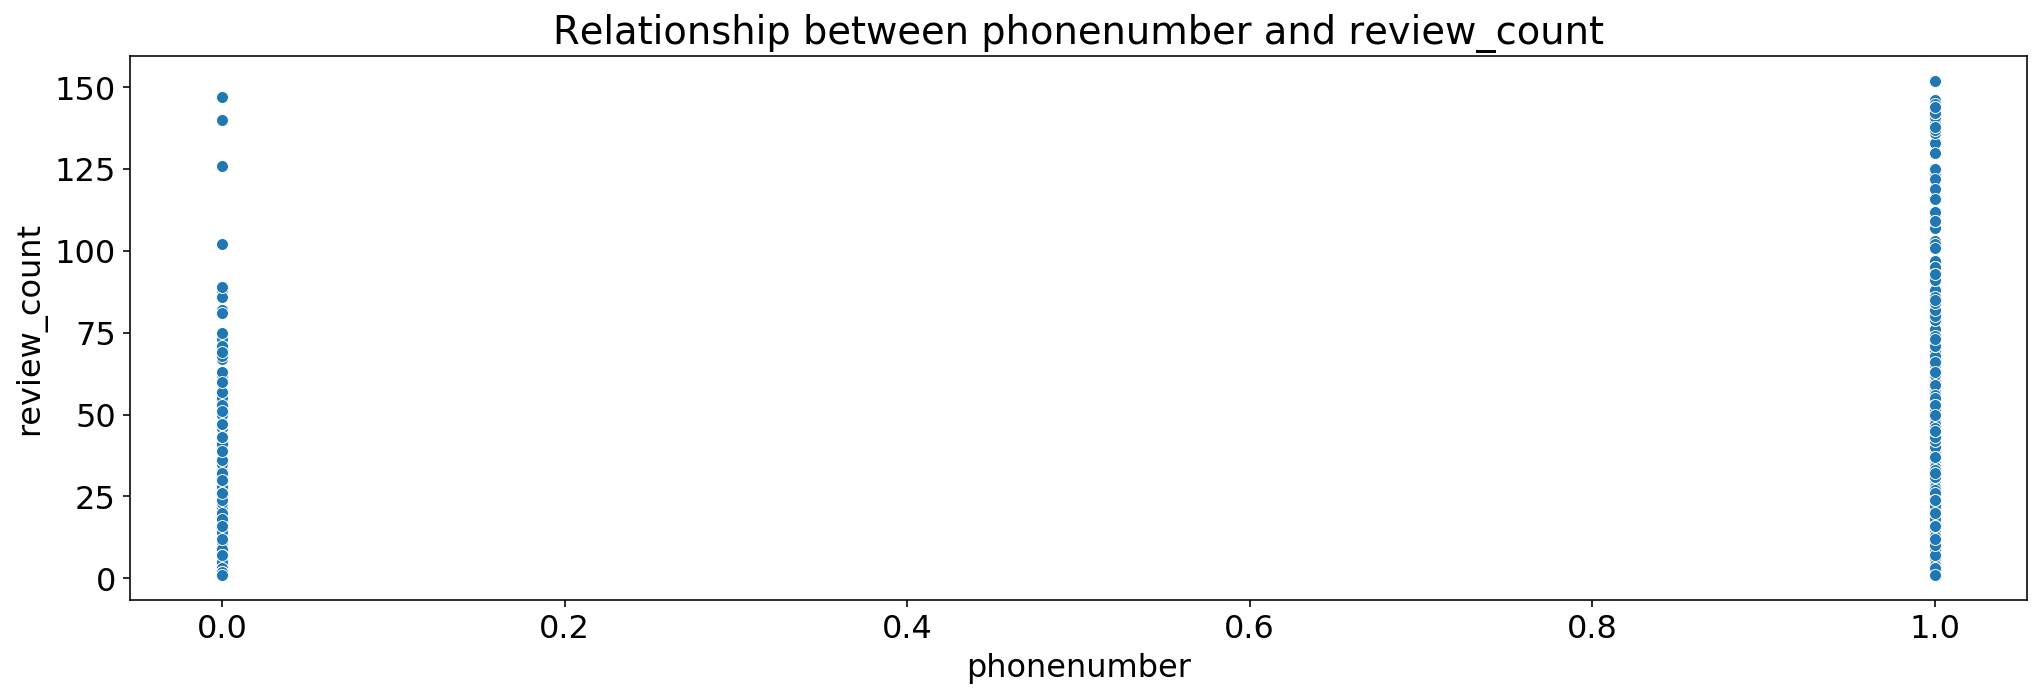

In [228]:
ax = sns.scatterplot(x='phonenumber', y='review_count', data=geo2)
ax.set_title('Relationship between phonenumber and review_count')

Based on above graph, it seems like parks which provide phone numbers have higher review counts. However, further correlation analysis is needed

Text(0.5, 1.0, 'Relationship between zipcode and yelp rating')

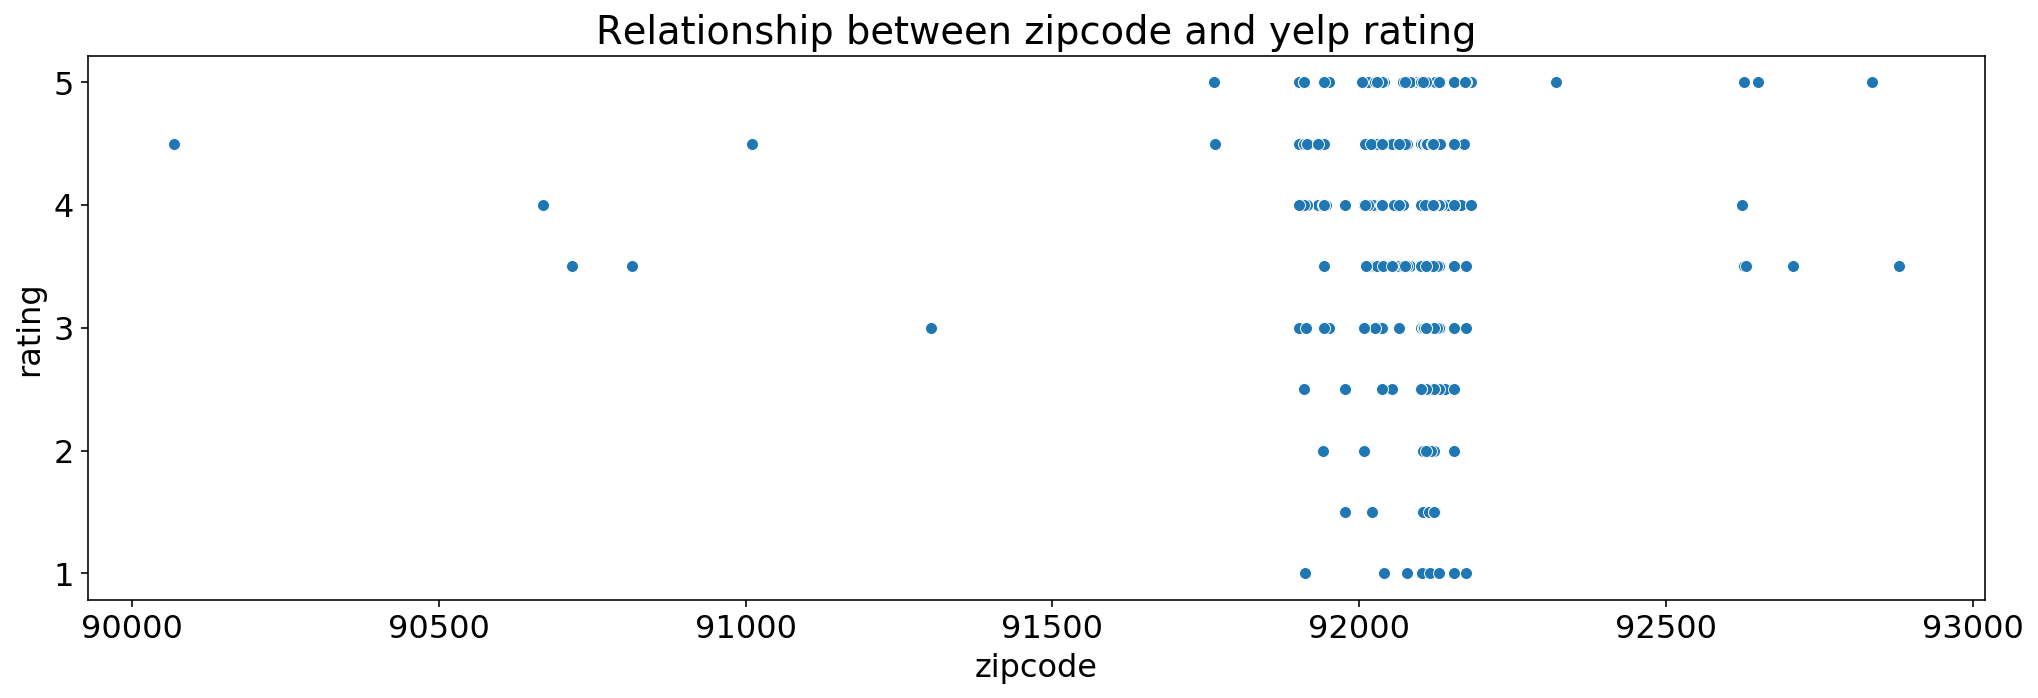

In [229]:
ax = sns.scatterplot(x='zipcode', y='rating', data=geo2)
ax.set_title('Relationship between zipcode and yelp rating')

Based on above graph, it is unclear if there is a relationship between zipcode and Yelp rating.

Text(0.5, 1.0, 'Relationship between phonenumber and yelp rating')

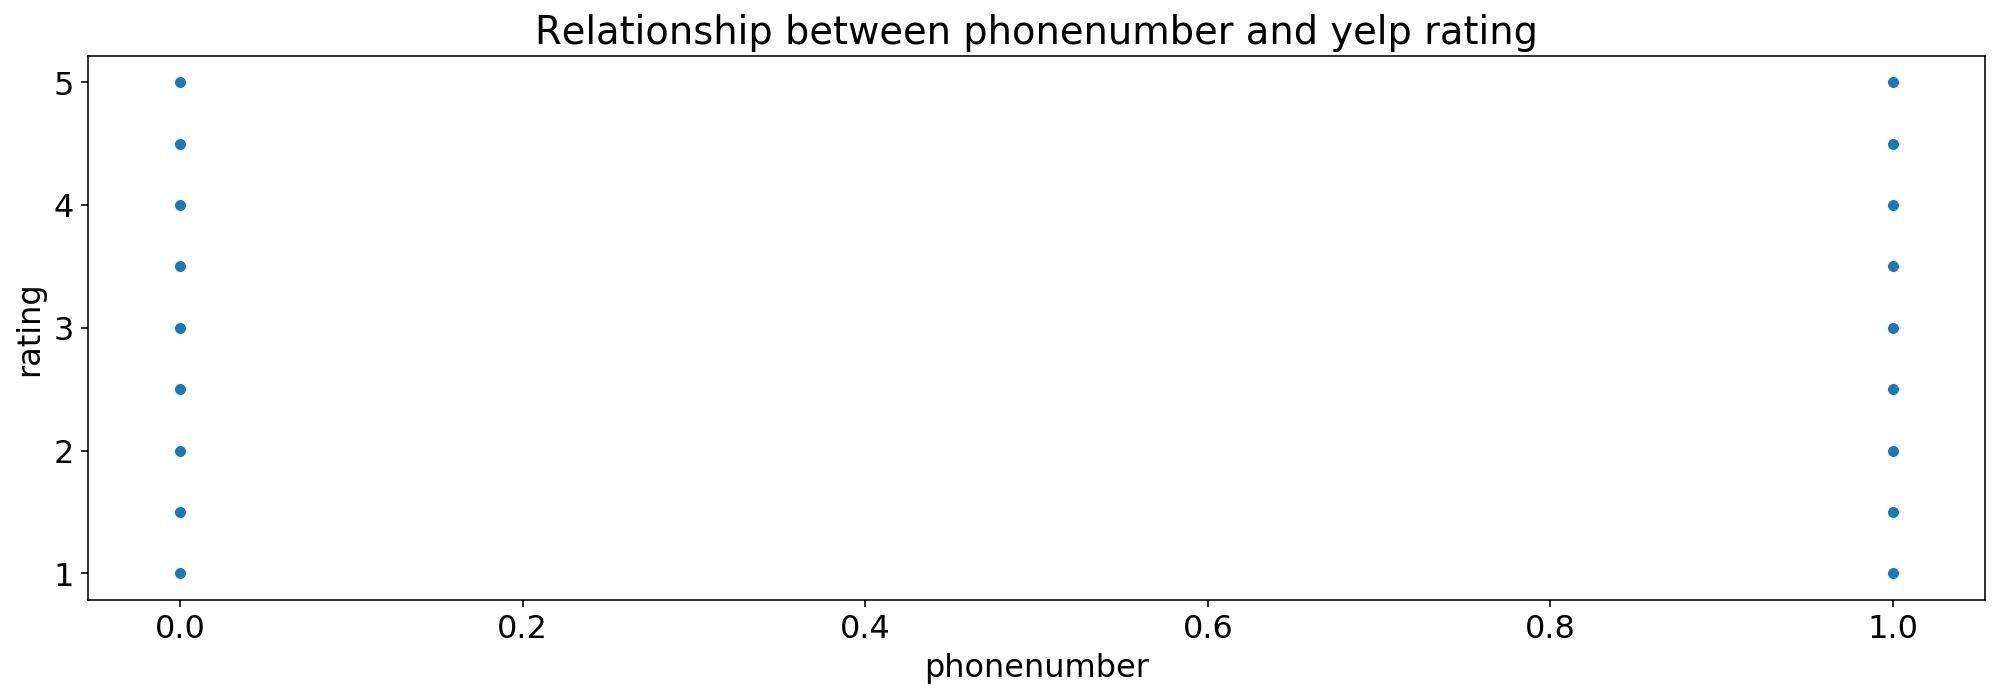

In [230]:
ax = sns.scatterplot(x='phonenumber', y='rating', data=geo2)
ax.set_title('Relationship between phonenumber and yelp rating')

In [231]:
phone_rating = geo2.groupby('phonenumber').agg('mean')
phone_rating[['rating']]

,rating
phonenumber,
0,4.021186
1,4.053699


Based on above graph, a multivariate analysis is insufficient to explain if  there is a relationship between zipcode and Yelp rating. However, a park may have higher rating if phone number is provided.

### Linear Regression
In this part, we will take a closer look at suggested relationships. Therefore, we will take a closer look at relationship between rating and review counts and relationship between provision of phone number and review counts.

In [232]:
outcome, predictors = patsy.dmatrices('review_count ~ rating', geo2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4337
Date:                Thu, 17 Dec 2020   Prob (F-statistic):              0.510
Time:                        12:05:16   Log-Likelihood:                -3262.2
No. Observations:                 655   AIC:                             6528.
Df Residuals:                     653   BIC:                             6537.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9896      6.795      4.855      0.0

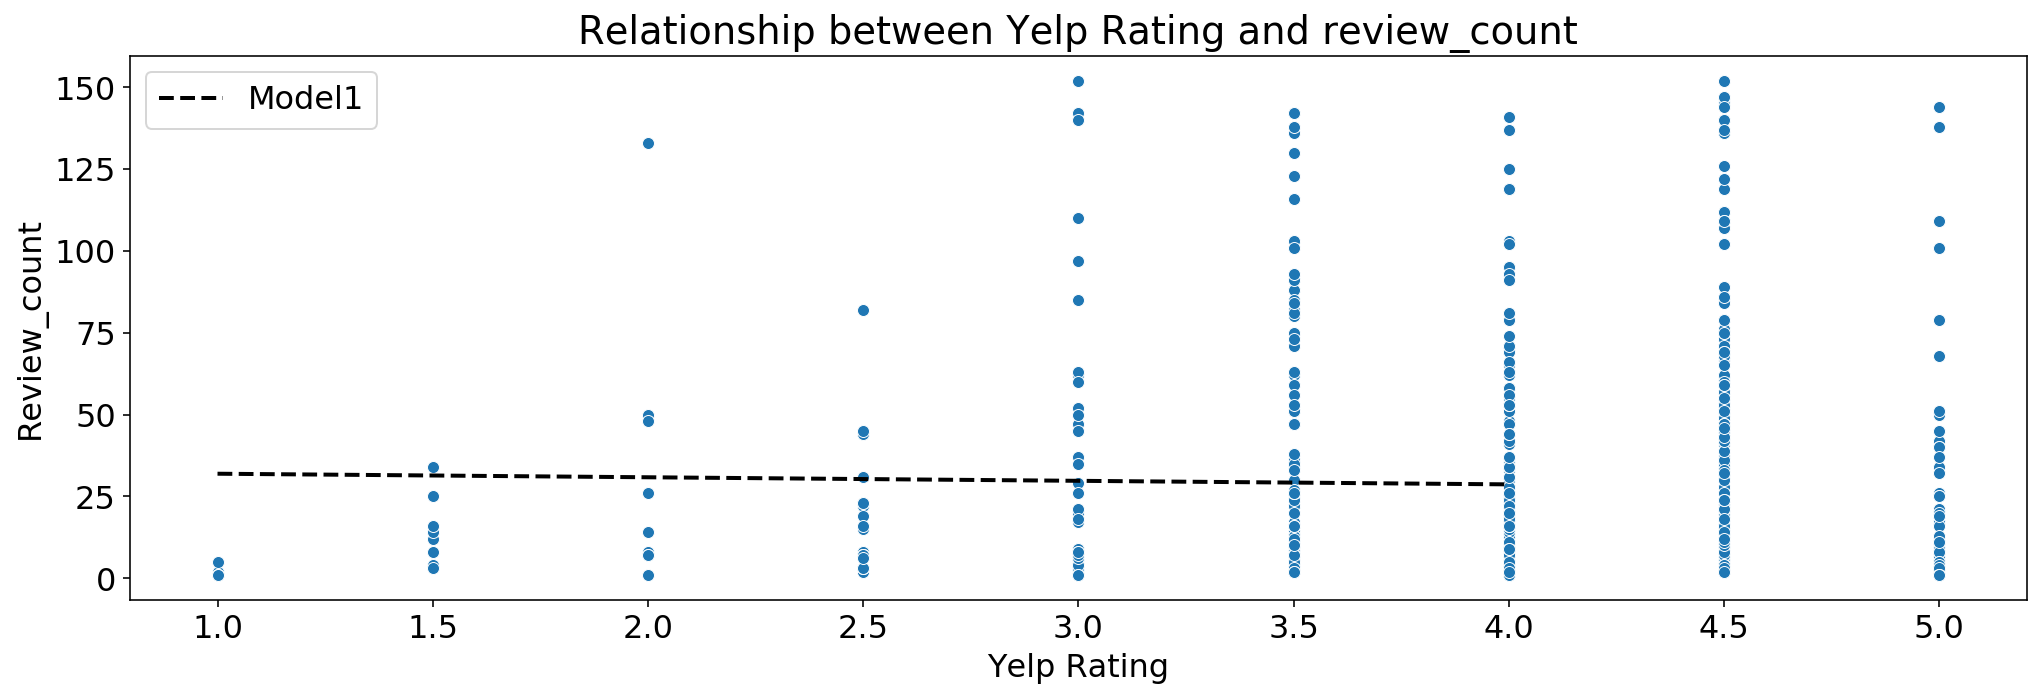

In [233]:
#plot original data
sns.scatterplot(x='rating', y='review_count', data=geo2)

#generate model fit line
xs = np.arange(geo2['rating'].min(), geo2['rating'].max())
ys = -1.0841 * xs + 32.9896 
plt.plot(xs, ys, '--k', linewidth=2, label='Model1')

plt.xlabel('Yelp Rating')
plt.ylabel('Review_count')
plt.title('Relationship between Yelp Rating and review_count')
plt.legend();

Though rating does not play a significant role to determine review count, as suggested by a p-value higher than 10%, The regression line do suggest that there may be a slight negative relationship between review count and Yelp rating. The higher the rating, the less the review count.

In [234]:
outcome, predictors = patsy.dmatrices('review_count ~ phonenumber', geo2)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     29.24
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           8.98e-08
Time:                        12:05:17   Log-Likelihood:                -3248.1
No. Observations:                 655   AIC:                             6500.
Df Residuals:                     653   BIC:                             6509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      18.8898      2.247      8.407      

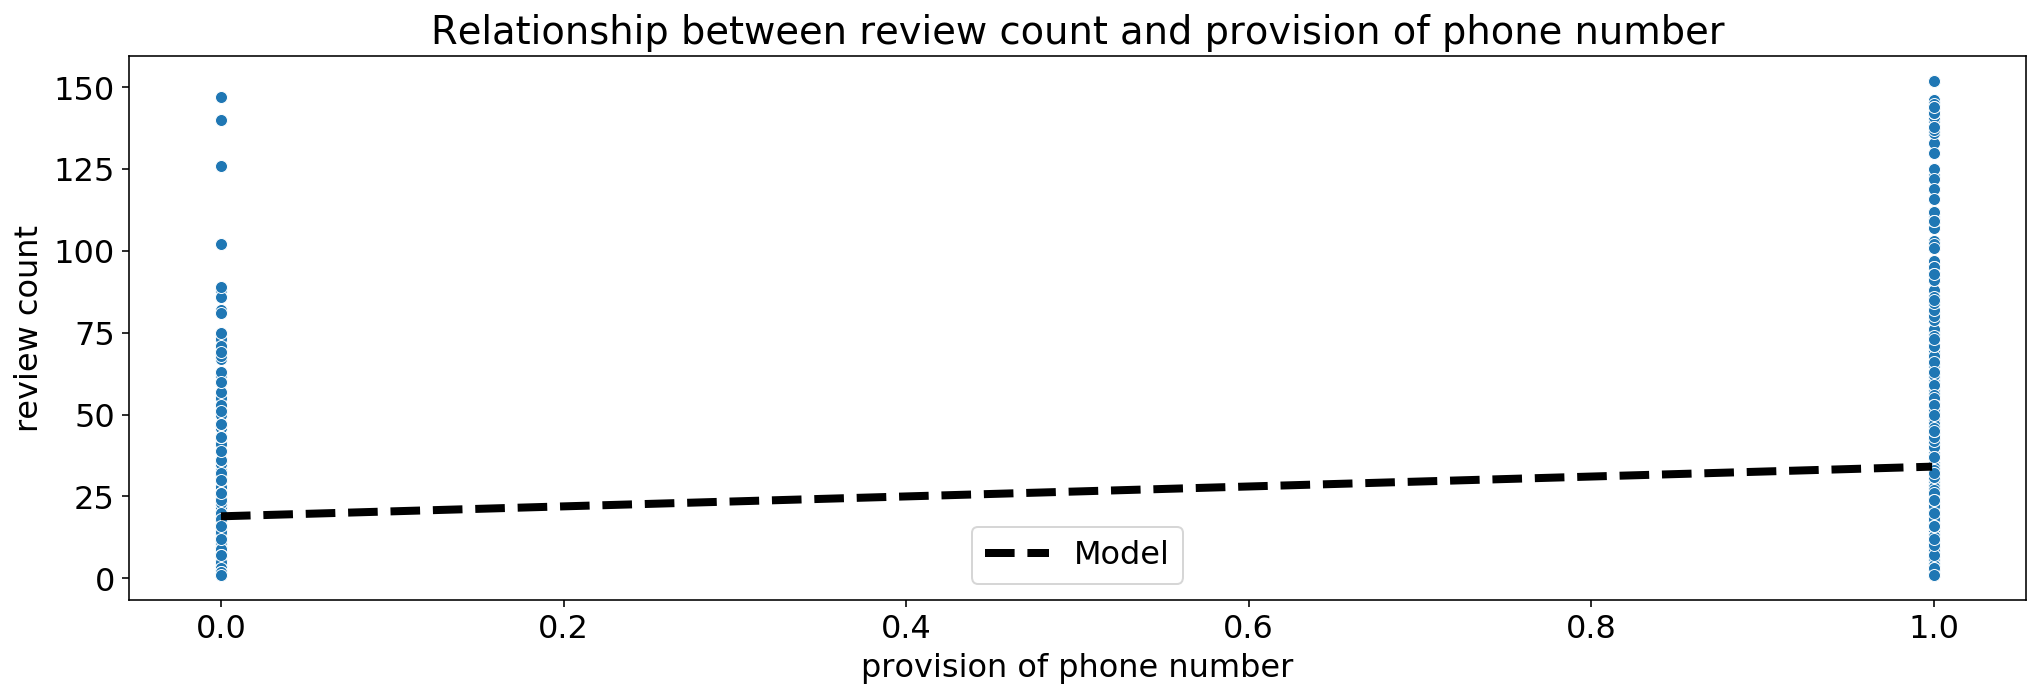

In [235]:
#plot original data
sns.scatterplot(x='phonenumber', y='review_count', data=geo2)

#generate model fit line
xs = np.arange(0,1,0.001)
ys = 15.1913 * xs + 18.8898
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('provision of phone number')
plt.ylabel('review count')
plt.title('Relationship between review count and provision of phone number')
plt.legend();

The coefficient p values suggest that the provision of phone numbers definitely plays a part in determing review counts. The above chart suggest that review counts are higher when phone number is provided.

# Ethics and Privacy

Enthical concern is necessary when conducting any data science projects. The dataset was given for use for COGS108 students for their final project, so i have the permission to use the 2 datasets included in this analysis for this purpose. Although I am not sure of the source of the datasets, the geographic information of parks are ususally public and Yelp datsets are always accessible to the public via Yelp's website. 

Although the Yelp dataset is made avaibible to the public, the participants who reviewed tha parks have to be kept anomynous with privacy concern. Howeverm this is already done when the dataset is provided to me, so there is no way I can use user's private information in this analysis.

There is potential bias for this project, due to how the Yelp dataset is colleced. The Yelp ratings is purely subjective, and people might intend to rate the park with non-extreme values (such as 1 and 5). Also, people whi gives ratings are just a small subset of the population. Some people will not rate the park although they went to a certain park. Thus the ratings are not very representive of how people really view each park. 

My major concern is my assumptions for dataset 2. Because I can not find visitors of each park annually online, so i assumed that review count is perfectly positively correlated with park visitors. However, this approach may bring heavy bias to the dataset, because not everyone who went to the park would leave a review for it, and this assumption can be wrong as people may only leave reviews when they have opinions (e.g. some parks are too perfect to have opinions).

Since the data is provided to me for this final project, I am not entorelt sure where the data came from and do not have complete understanding for each dataset. The analysis performed and assumption might ignored,emphasized or derived certain factors of the data. In terms of privacy, since this data is provided to me solely for this project, I shall not leak it to people who did not attend this course in Fall 2020.

# Conclusion
In this project, I intended to find the relationship between review_counts, ratings,the provision of phone numbers on yelp and zipcodes of parks to explore if yelp information brings more visitors to each park. I cleaned yelp_SD_parks.csv by closely examine the data and excluded super-outliers from the data based on review_count.Next, I did univariate analysis to examine the distribution of each variable, and use multi-variable analysis to visualize of there exist an relationship between 2 variable. Lastly, I took out varaible pairs that seem to have relationship, and examined their relationship closely using linear regression. In details, I performed linear regression analysis and plot best fit line to see what the relationship exactly is for relationship between provision of phone number and review counts and the relationship between yelp rating and review counts.

Suggested by my analysis, there is maybe a slightly negative relationship between Yelp rating and the number of visits (replaced by review counts) to a park, while I hypothesized a positive relationship between Yelp rating and the number of visits; there is no evidential relationship between zipcodes and number of visitors, while i hypothesized higher visits at certain region and lower in other; providing phone numbers will leads to higher number of visitors, while I hypothesized the same.

There are several limitations with this analysis.First, linear regression may not be the best way to capture relationships between intended variable pairs in this project.Secondly, an major assumption made for this dataset is that review count has a perfectly positive relationship with visitor counts, which makes it eligible to substitute for visitor counts in this project. This assumption could be wrong since whether or people leave reviews are very subjective, and review count may not be able to represent visitor count.

This project may help parks to further insight the relationship between their annual visitors and yelp reviews. It may inform the parks how to increase their annual visitors with features on yelp, such as provide their phone numbers on the platform.